In [1]:
# Starter code for use with autograder.
import numpy as np
import matplotlib.pyplot as plt

In [70]:

def get_cumul_var(mnist_pics,
                  num_leading_components=500):

    """
    Perform PCA on mnist_pics and return cumulative fraction of variance
    explained by the leading k components.

    Returns:
        A (num_leading_components, ) numpy array where the ith component
        contains the cumulative fraction (between 0 and 1) of variance explained
        by the leading i components.

    Args:

        mnist_pics, (N x D) numpy array:
            Array containing MNIST images.  To pass the test case written in
            T5_P2_Autograder.py, mnist_pics must be a 2D (N x D) numpy array,
            where N is the number of examples, and D is the dimensionality of
            each example.

        num_leading_components, int:
            The variable representing k, the number of PCA components to use.
    """

    


    
    # Compute PCA on input mnist_pics

    # Find empiracle covariance matrix S
    S = np.cov(mnist_pics.T)
    # Find eigen vectors and with top 500 highest  eigenvalues
    values, vectors = np.linalg.eig(S)

    ret = np.zeros(num_leading_components)
    value_list = list(values)
    pc_list = []

    for i in range(num_leading_components):
        max_pos = np.argmax(value_list)
        ret[i:] += value_list[max_pos].real
        pc_list.append(w[max_pos])
        del value_list[max_pos]

    return ret

In [133]:
S.shape

(784, 784)

In [3]:
# data = mnist_pics
# summed = np.array([v if v > 1 else 1 for v in np.sum(mnist_pics, axis=0)])
num_leading_components = 500
# Load MNIST.
mnist_pics = np.load("data/images.npy")

# Reshape mnist_pics to be a 2D numpy array.
num_images, height, width = mnist_pics.shape
mnist_pics = np.reshape(mnist_pics, newshape=(num_images, height * width))

data = (mnist_pics - np.mean(mnist_pics))/ np.std(mnist_pics)

In [4]:
S.shape

(784, 784)

In [23]:
ret = np.zeros(num_leading_components)

# Find empiracle covariance matrix S
S = np.cov(data.T)
values, vectors = np.linalg.eig(S)
value_list = list(values)
vector_list = list(vectors.T)
# Find eigen vectors and with top 500 highest  eigenvalues
pc_list = []
v_list = []
for i in range(num_leading_components):

    # Find the position of the  max eigen value
    max_pos = np.argmax(value_list)
    #  add its value to the retained vairance list
    ret[i:] += value_list[max_pos].real

    # Save the eigenvalue and eigenvector
    pc_list.append(vector_list[max_pos].real)
    v_list.append(value_list[max_pos].real)

    del value_list[max_pos]
    del vector_list[max_pos]


ret = ret/np.sum(v_list)

In [49]:
a,b = list(zip(*(sorted(zip(list(values), list(vectors.T)), key=lambda pair: pair[0]))))

88061487e-02+0.j, -3.97671211e-02+0.j, -3.82488559e-02+0.j,
       -3.37323564e-02+0.j, -2.89539534e-02+0.j, -2.45670880e-02+0.j,
       -1.82415421e-02+0.j, -1.18265718e-02+0.j, -7.72866549e-03+0.j,
       -5.54962969e-03+0.j, -3.05822435e-03+0.j, -1.13959629e-03+0.j,
       -2.82890938e-04+0.j, -4.89669245e-05+0.j, -6.52360327e-18+0.j,
       -6.52360327e-18+0.j, -6.52360327e-18+0.j, -6.52360327e-18+0.j,
       -6.52360327e-18+0.j, -6.52360327e-18+0.j,  8.06223631e-07+0.j,
       -1.30625138e-05+0.j, -3.10665379e-04+0.j, -1.73821641e-03+0.j,
       -4.04170916e-03+0.j, -8.22301502e-03+0.j, -1.29235802e-02+0.j,
       -1.73772811e-02+0.j, -1.78051545e-02+0.j, -1.64630285e-02+0.j,
       -1.48208666e-02+0.j, -1.38247167e-02+0.j, -1.13371937e-02+0.j,
       -9.21681508e-03+0.j, -7.40796068e-03+0.j, -5.03044864e-03+0.j,
       -2.93623478e-03+0.j, -1.98349594e-03+0.j, -1.03452576e-03+0.j,
       -3.20145388e-04+0.j, -9.77418574e-05+0.j, -6.52360327e-18+0.j,
       -6.52360327e-18+0.j, -6

In [83]:
S = np.cov(data.T)
So = np.dot(data.T, data)/len(data[0])

print(S[:10])
print(So[:10])

[[8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]
 [8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]
 [8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]
 ...
 [8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]
 [8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]
 [8.3907493e-29 8.3907493e-29 8.3907493e-29 ... 8.3907493e-29
  8.3907493e-29 8.3907493e-29]]
[[1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.38564226]
 [1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.38564226]
 [1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.38564226]
 ...
 [1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.38564226]
 [1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.38564226]
 [1.38564226 1.38564226 1.38564226 ... 1.38564226 1.38564226 1.385

In [73]:
sorted([1,2,3], reverse=True)

[3, 2, 1]

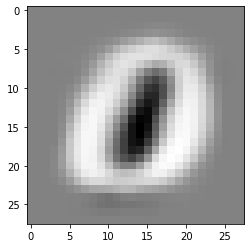

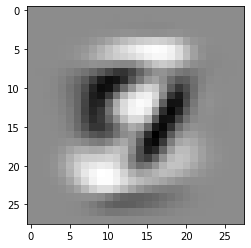

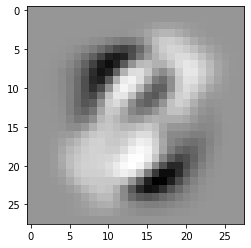

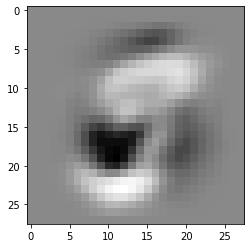

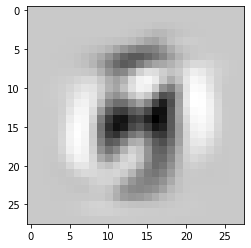

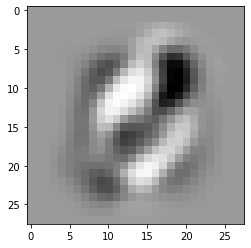

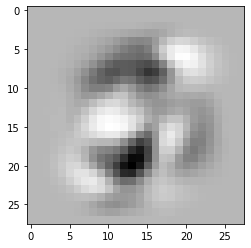

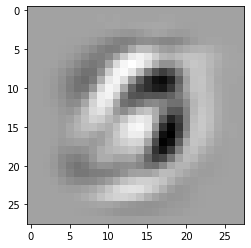

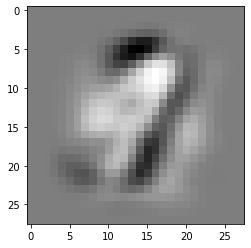

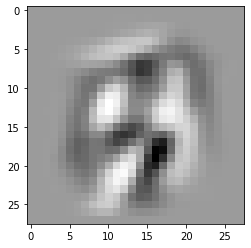

In [86]:
# ret = np.zeros(num_leading_components)

# Find empiracle covariance matrix S
S = np.cov(data.T)
values, vectors = np.linalg.eig(S)

value_list = list(values.real)
vector_list = list(vectors.T.real)

pc_list = []
v_list = []
for i in range(num_leading_components):

    # Find the position of the  max eigen value
    max_pos = np.argmax(value_list)
    #  add its value to the retained vairance list
    ret[i:] += value_list[max_pos].real

    # Save the eigenvalue and eigenvector
    pc_list.append(vector_list[max_pos].real)
    v_list.append(value_list[max_pos].real)

    del value_list[max_pos]
    del vector_list[max_pos]

ret = np.cumsum(v_list) / np.sum(v_list)

for i in range(10):
    draw(pc_list[i])
plt.show()

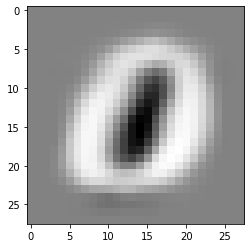

In [75]:
draw(pc_list[0])

In [ ]:
# Find empiracle covariance matrix S
S = np.cov(data.T)
U, sing, vt = np.linalg.svd(S)

pc_list = vt[:500]
value_list = sing[:500]
ret = np.cumsum(value_list) / np.sum(value_list)

In [21]:

def draw(img):
    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='Greys_r')

def plot_vals(ls, xl, yl, t):
    font = {'color':  'darkblue', 'size': 16}
    plt.title(t, fontdict=font)
    plt.xlabel(xl, fontdict=font)
    plt.ylabel(yl, fontdict=font)
    plt.plot(ls)

# Find empiracle covariance matrix S
S = np.cov(data.T)
U, sing, vt = np.linalg.svd(S)

pc_list = vt[:500]
value_list = sing[:500]
ret = np.cumsum(value_list) / np.sum(value_list)

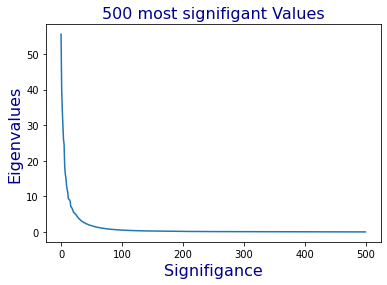

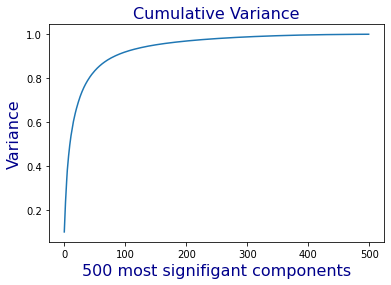

Variance explained by the first 500 images: 0.9999999999999993


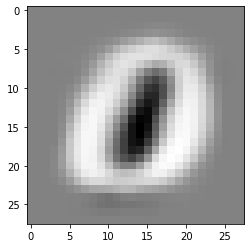

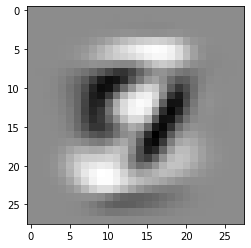

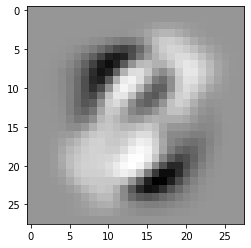

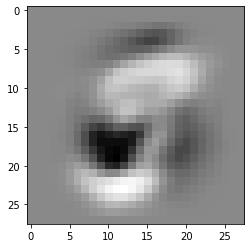

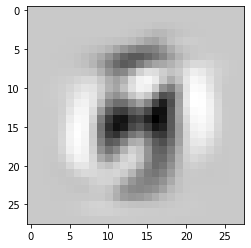

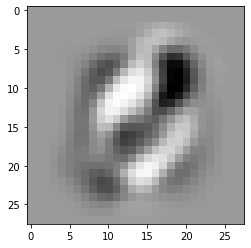

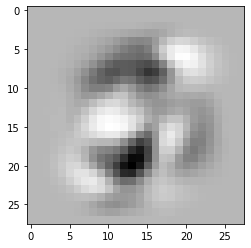

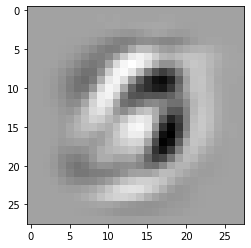

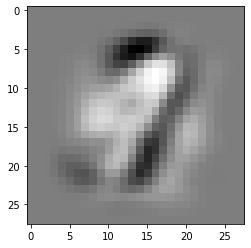

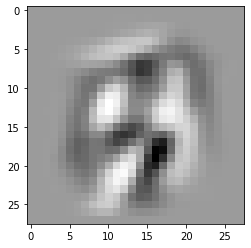

In [87]:
# Plot the values for the 500 most signifigant aigenvectors in order from most signifgant to least
plot_vals(v_list, t="500 most signifigant Values", yl="Eigenvalues", xl="Signifigance")
plt.show()
plot_vals(ret, t="Cumulative Variance", yl="Variance", xl="500 most signifigant components")
plt.show()
print("Variance explained by the first 500 images:", ret[-1])

for i in range(10):
    draw(pc_list[i])
plt.show()

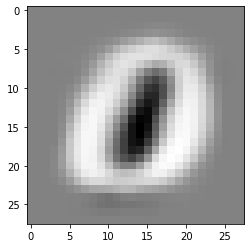

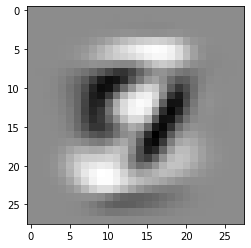

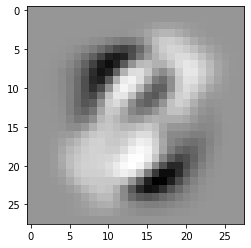

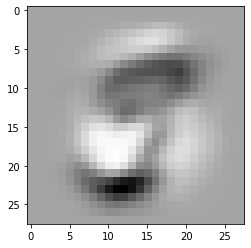

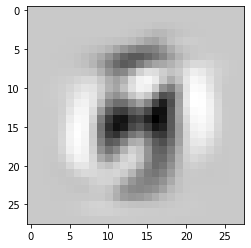

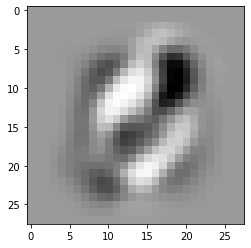

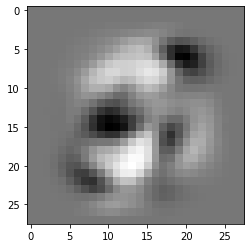

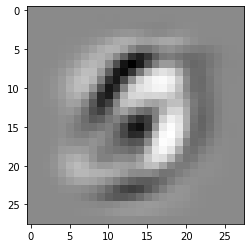

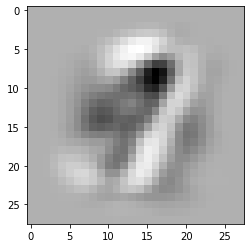

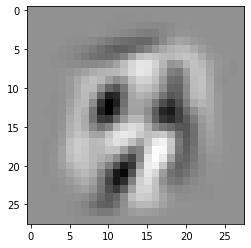

In [88]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 500
pca_data = pca.fit_transform(data)

for i in range(10):
    draw(pca.components_[i])
plt.show()

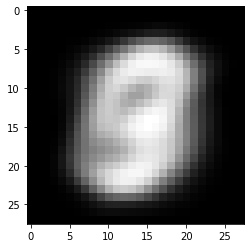

In [8]:
avrg_val = np.sum(data, axis=0)/len(data)
draw(avrg_val)

In [71]:
# Load MNIST.
mnist_pics = np.load("data/images.npy")

# Reshape mnist_pics to be a 2D numpy array.
num_images, height, width = mnist_pics.shape
mnist_pics = np.reshape(mnist_pics, newshape=(num_images, height * width))

num_leading_components = 500

cum_var = get_cumul_var(
    mnist_pics=mnist_pics,
    num_leading_components=num_leading_components)

# Example of how to plot an image.
plt.figure()
plt.imshow(mnist_pics[0].reshape(28,28), cmap='Greys_r')
plt.show()


ValueError: operands could not be broadcast together with shapes (500,) (784,) (500,) 

In [14]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

from scipy.linalg import eigh
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ", vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

# import pandas as pd
# new_coordinates = np.vstack((new_coordinates, labels)).T

# dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
# print(dataframe.head())


(6000, 784)
The shape of variance matrix =  (784, 784)
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


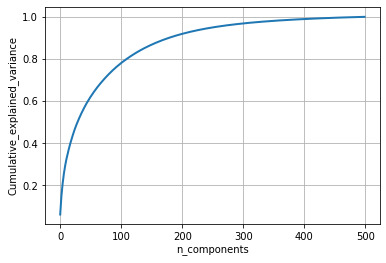

In [17]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 500
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative_explained_variance")
plt.show()

In [23]:
standardized_data == data

The shape of variance matrix =  (784, 784)
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [21]:
from sklearn.preprocessing import StandardScaler
mnist_pics = np.load("data/images.npy")
num_images, height, width = mnist_pics.shape
mnist_pics = np.reshape(mnist_pics, newshape=(num_images, height * width))
standardized_data = StandardScaler().fit_transform(mnist_pics)
covar_matrix = np.matmul(standardized_data.T , standardized_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

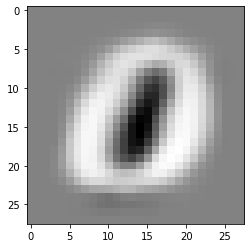

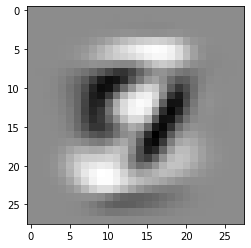

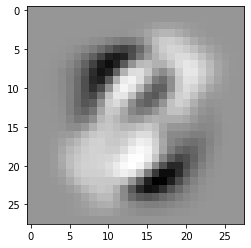

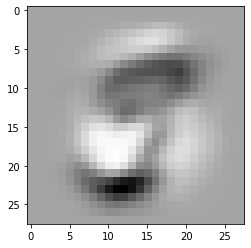

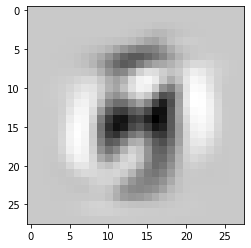

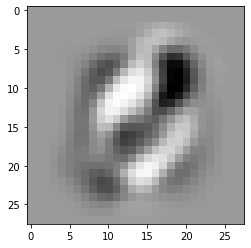

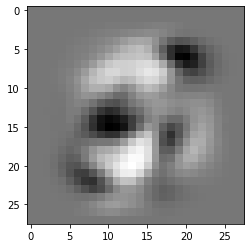

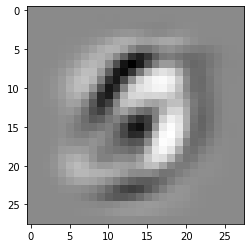

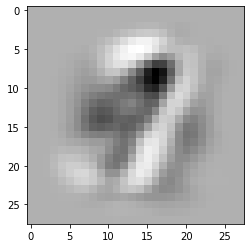

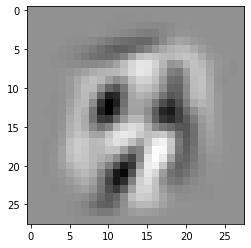

In [29]:

# PCA for dimensionality redcution (non-visualization)

# percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
# cum_var_explained = np.cumsum(percentage_var_explained)